# 4.1 데이터에서 학습한다.

# 4.1.1 데이터 주도학습

# 4.1.2 훈련데이터와 시험데이터

기계학습 문제는 데이터를 훈련데이터와 시험데이터로 나눠 학습과 실험을 수행하는 것이 일반적이다. 우선 훈련 데이터만 사용하여 학습하면서 최적의 매개변수를 찾는다. 그런 다음 시험데이터를 사용하여 앞서 훈련한 모델의 실력을 평가한다.

데이터셋 하나로만 매개변수의 학습과 평가를 수행하면 올바른 평가가 될 수 없다.

참고로 한 데이터셋에만 지나치게 최적화된 상태를 오버피팅이라고 한다. 오버피팅 피하기는 기계학습의 중요한 과제이기도 하다.


# 4.2 손실함수

신경망 학습에서는 현재의 상태를 '하나의 지표'로 표현한다. 그리고 그 지표를 가장 좋게 만들어주는 가중치 매개변수의 값을 탐색하는 것이다. 신경망은 '하나의 지표'를 기준으로 최적의 매개변수 값을 탐색한다. 신경망 학습에서 사용하는 지표는 **손실함수** 라고 한다. 이 손실함수는 임의의 함수를 사용할 수도 있지만, 일반적으로는 오차 제곱합과 교차 엔트로피 오차를 사용한다.

## 4.2.1 오차제곱합

오차제곱합(sum of squares for error, SSE)


$$
\text{E} = \frac{1}{2} \sum_{k} (y_k - t_k)^2
$$

$y_k$는 신경망의 출력(신경망이 추정한 값), $t_k$는 정답 레이블, k는 데이터의 차원수

In [1]:
import numpy as np

def sum_squares_error(y,t):
    return 0.5*np.sum((y-t)**2)

In [4]:
#함수 예시

#정답이 2라 하자.
t=[0,0,1,0,0,0,0,0,0,0]

#예1: '2'일 확률이 높다고 추정
y=[0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
print(sum_squares_error(np.array(y),np.array(t)))

#예2: '7'일 확률이 가장 높다고 추정한다면
y=[0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0, 0.6, 0.0, 0.0]
print(sum_squares_error(np.array(y),np.array(t)))

0.09750000000000003
0.5975


첫번째 예의 손실함수쪽 출력이 작으며, 정답 레이블과의 오차도 작은 것을 알 수 있다. 즉, 오차제곱합 기준으로는 첫 번째 추정 결과가 정답에 더 가까운 것으로 판단 가능하다.

## 4.2.2

또 다른 손실함수로서 교차 엔트로피 오차(cross entropy error, CEE)도 자주 이용한다.

$$
E = - \sum_{k} t_k \log(y_k)
$$

여기서 log는 밑이 e인 자연로그이다. $y_k$는 신경망의 출력, $t_k$는 정답 레이블이다. 

또 $t_k$는 정답에 해당하는 인덱스의 원소만 1이고 나머지는 0이다(원-핫 인코딩). 그래서 실질적으로 정답일 때의 추정($t_k$가 1일 때의 $y_k$)의 자연로그를 계싼하는 식이 된다. 또한 확률이 높을수록 손실이 작고, 확률이 낮을 수록 손실이 크다는 의미를 갖는다.

In [5]:
def cross_entropy_error(y,t):
    delta=1e-7
    return -np.sum(t*np.log(y+delta))   # np.log를 계산할 때 아주 작은 값인 delta를 더했다.
                                        # 이는 np.log()함수에 0을 입력하면 마이너스 무한대를 뜻하는 -inf가 되어 더이상 계산을 진행할 수 없기 때문에 
                                        # 아주 작은 값을 더해서 절대 0이 되지 않도록, 즉 마이너스 무한대가 발생하지 않도록 한 것이다.

In [8]:
t=[0,0,1,0,0,0,0,0,0,0]
#첫번째 예시
y=[0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
print(cross_entropy_error(np.array(y),np.array(t)))

#두번째 예시
y=[0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0, 0.6, 0.0, 0.0]
print(cross_entropy_error(np.array(y),np.array(t)))

0.510825457099338
2.302584092994546


위를 보면 결과(오차값)가 더 작은 첫번째 추정이 정답일 가능성이 높다고 판단한 것으로, 앞서 오차제곱합의 판단과 일치한다.

In [9]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
from dataset.mnist import load_mnist

(x_train, t_train), (x_test,t_test) = \
    load_mnist(normalize=True, one_hot_label=True)

print(x_train.shape)        # (60000, 784)
print(t_train.shape)        # (60000, 10)

(60000, 784)
(60000, 10)


In [ ]:
# 훈련 데이터에서 무작위로 10장만 빼내기.
train_size=x_train.shape[0]
batch_size=10
batch_mask=np.random.choice(train_size, batch_size)
x_batch=x_train[batch_mask]
t_batch=t_train[batch_mask]

In [14]:
batch_mask

array([29300, 13796,  1227, 38708, 17620, 13501, 14973, 37931, 49646,
       33022])

## 4.2.4 (배치용) 교차 엔트로피 오차 구현하기

여기에서는 데이터가 하나인 경우와 데이터가 배치로 묶여 입력될 경우 모두를 처리하도록 구현하자.

In [24]:
def cross_entropy_error(y,t):
    if y.ndim==1:
        t=t.reshape(1,t.size)
        y=y.reshape(1,y.size)

    batch_size=y.shape[0]
    return -np.sum(t*np.log(y+1e-7))/batch_size

y는 신경망의 출력, t는 정답 레이블. y가 1차원이라면, 즉 데이터 하나당 교차 엔트로피 오차를 구하는 경우는 reshape함수로 데이터의 형상을 바꿔준다. 그리고 배치의 크기로 나눠 정규화하고 이미지 1장당 평균의 교차 엔트로피 오차를 계산한다.

정답 레이블이 원-핫 인코딩이 아니라 '2'나 '7'등의 숫자레이블로 주어졌을 때의 교차 엔트로피 오차는 다음과 같이 구현할 수 있다.

In [25]:
def cross_entropy_error(y,t):
    if y.ndim==1:
        t=t.reshape(1,t.size)
        y=y.reshape(1,y.size)

    batch_size=y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size),t]+1e-7))/batch_size

In [30]:
# 나쁜 미분 구현의 예

def numerical_diff(f,x):
    h=1e-50
    return (f(x+h)-f(x))/h

위의 미분 구현은 

1. h가 너무 작아 발생하는 반올림 오차의 문제
2. 진정한 미분과 이 구현의 값은 엄밀히 일치하지 않는다.

의 문제가 존재한다.

이는 h의 값을 1e-4를 이용하고, 차분을 이용하는 방법으로 극복한다.

In [32]:
def numerical_diff(f,x):
    h=1e-4
    return (f(x+h)-f(x-h))/(2*h)

## 4.3.2 수치 미분의 예

In [33]:
def function_1(x):
    return 0.01*x**2+0.1*x

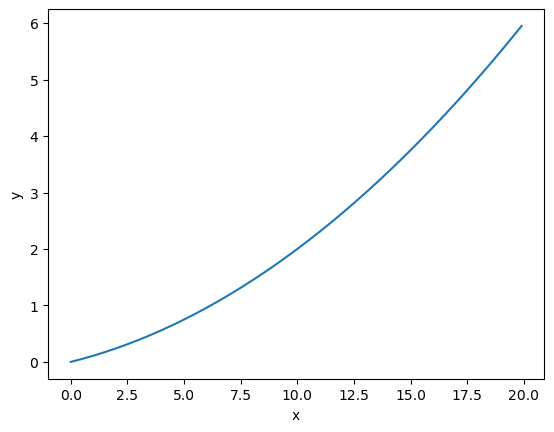

In [36]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(0.,20.,0.1)
y=function_1(x)
plt.plot(x,y)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [39]:
print(numerical_diff(function_1,5))
print(numerical_diff(function_1,10))

0.1999999999990898
0.2999999999986347


0.1999999999990898


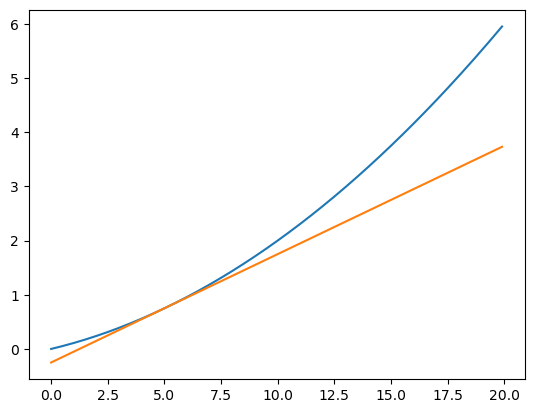

0.2999999999986347


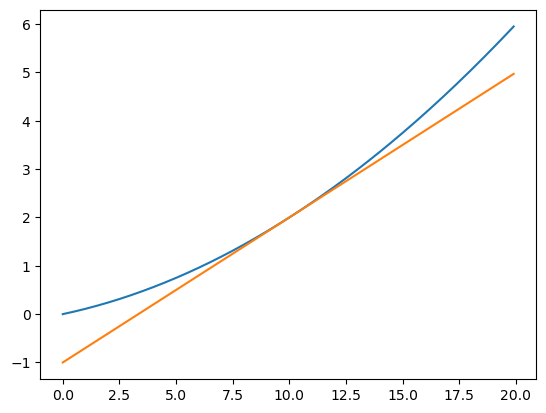

In [41]:
# 접선 그리기(x = 5)
tf = tangent_line(function_1, 5)
y2 = tf(x)

plt.plot(x, y)
plt.plot(x, y2)
plt.show()

# 접선 그리기(x = 10)
tf = tangent_line(function_1, 10)
y2 = tf(x)

plt.plot(x, y)
plt.plot(x, y2)
plt.show()

## 4.3.3 편미분

변수가 두개인 함수를 구현해보자.

In [42]:
def function_2(x):                  #인수 x는 넘파이의 배열이라고 가정하자. 
    return x[0]**2+x[1]**2

# 또는 return np.sum(x**2)

문제1: x0=3, x1=4일 때 x0에 대한 편미분을 구하라.

In [43]:
def function_tmp1(x0):
    return x0*x0+4.0**2.0
numerical_diff(function_tmp1,3.0)

6.00000000000378

문제2: x0=3, x1=4일 때 x1에 대한 편미분을 구하라.

In [47]:
def function_tmp2(x1):
    return 3.0**2.0+x1*x1
numerical_diff(function_tmp2, 4.0)

7.999999999999119

# 4.4 기울기

앞 절의 예에서는 x0와 x1의 편미분을 변수별로 따로 계산함.

만약 x0와 x1의 편미분을 동시계산하고 싶다면?

In [56]:
import numpy as np

#참고) 편미분을 차분법으로 할 경우: (f(x0+h,x1)-f(x0-h,x1))/2h 이렇게 하면 된다.

def numerical_gradient(f, x):
    h = 1e-4 # 0.0001
    grad = np.zeros_like(x) # x와 형상이 같은 배열을 생성
    
    for idx in range(x.size):
        tmp_val = x[idx]
        
        # f(x+h) 계산
        x[idx] = float(tmp_val) + h
        fxh1 = f(x)                     #f는 배열 전체를 받는 함수인 것을 참고해라.
        
        # f(x-h) 계산
        x[idx] = tmp_val - h 
        fxh2 = f(x) 
        
        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val # 값 복원
        
    return grad

In [57]:
numerical_gradient(function_2,np.array([3.0,4.0]))

array([6., 8.])

In [58]:
numerical_gradient(function_2,np.array([0.0,2.0]))

array([0., 4.])

In [59]:
numerical_gradient(function_2,np.array([3.0,0.0]))

array([6., 0.])

기울기는 가장 낮은 장소를 가리키지만, 실제는 반드시 그렇다고는 할 수 없다. 사실 기울기는 각 지점에서 낮아지는 방향을 가리킨다. 더 정확히 말하자면 기울기가 가리키는 쪽은 각 장소에서 함수의 출력값을 가장 크게 줄이는 방향이다.

## 4.4.1 경사법(경사 하강법)

In [65]:
def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x=init_x

    for i in range(step_num):
        grad=numerical_gradient(f,x)
        x-=lr*grad
    return x

문제: 경사법으로 f(x0, x1)=(x0)^2+(x1)^2의 최소값을 구하라.

In [66]:
def function_2(x):
    return x[0]**2+x[1]**2

init_x=np.array([-3.0, 4.0])
gradient_descent(function_2,init_x, lr=0.1, step_num=100)

array([-6.11110793e-10,  8.14814391e-10])

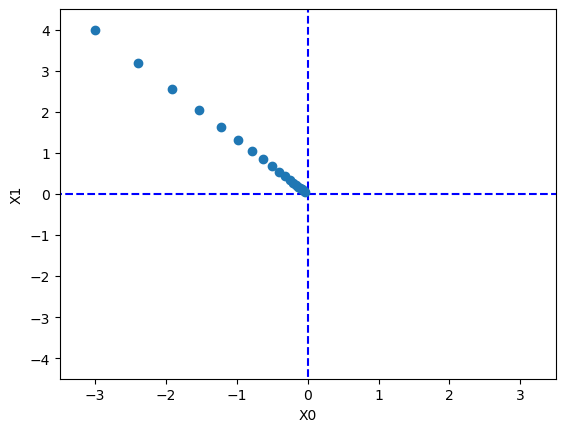

In [63]:
# coding: utf-8
import numpy as np
import matplotlib.pylab as plt
from gradient_2d import numerical_gradient


def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x
    x_history = []

    for i in range(step_num):
        x_history.append( x.copy() )

        grad = numerical_gradient(f, x)
        x -= lr * grad

    return x, np.array(x_history)


def function_2(x):
    return x[0]**2 + x[1]**2

init_x = np.array([-3.0, 4.0])    

lr = 0.1
step_num = 20
x, x_history = gradient_descent(function_2, init_x, lr=lr, step_num=step_num)

plt.plot( [-5, 5], [0,0], '--b')
plt.plot( [0,0], [-5, 5], '--b')
plt.plot(x_history[:,0], x_history[:,1], 'o')

plt.xlim(-3.5, 3.5)
plt.ylim(-4.5, 4.5)
plt.xlabel("X0")
plt.ylabel("X1")
plt.show()

실제 최소값인 (0,0)에 가까운 결과가 나옴.

이제, 학습률이 너무 크거나 작으면 좋은 결과를 얻을 수 없다는 것을 실험해보자.

In [72]:
#학습률이 너무 큰 경우.
init_x=np.array([-3.0,4.0])
print(gradient_descent(function_2,init_x, lr=10.0, step_num=100))

#학습률이 너무 작은 경우
init_x=np.array([-3.0,4.0])
print(gradient_descent(function_2,init_x, lr=1e-10, step_num=100))

[-2.58983747e+13 -1.29524862e+12]
[-2.99999994  3.99999992]


이 실험결과와 같이 학습률이 너무 크면 큰 값으로 발산해버린다. 반대로 너무 작으면 거의 갱신되지 않은채 끝난다.

## 4.4.2 신경망에서의 기울기

In [2]:
#gradient_simplenet.py

import sys, os
sys.path.append(os.pardir) # 부모 디렉터리의 파일을 가져올 수 있도록 설정

import numpy as np
from common.functions import softmax, cross_entropy_error
from common.gradient import numerical_gradient


class simpleNet:
    def __init__(self):
        self.W = np.random.randn(2,3) # 정규분포로 초기화

    def predict(self, x):
        return np.dot(x, self.W)

    def loss(self, x, t):
        z = self.predict(x)
        y = softmax(z)
        loss = cross_entropy_error(y, t)

        return loss


In [8]:
net=simpleNet()
print(net.W)                #가중치 매개변수
x=np.array([0.6,0.9])
p=net.predict(x)
print(p)
print(np.argmax(p))         #최대값의 인덱스
t=np.array([0,0,1])         #정답레이블
print(net.loss(x,t))        #손실함수 결과과

[[ 0.55303736 -1.98855567  0.30202955]
 [-0.66705377  1.73362724 -0.7640439 ]]
[-0.26852598  0.36713112 -0.50642178]
1
1.5398694219591578


In [9]:
#이어서 기울기를 구해보자.

def f(W):
    return net.loss(x,t)

dW=numerical_gradient(f, net.W)
print(dW)

[[ 0.16319652  0.30815786 -0.47135438]
 [ 0.24479478  0.4622368  -0.70703157]]


In [10]:
#위의 함수는 lamda 함수로 구현하는 것이 더욱 간단하다.
f=lambda W: net.loss(x,t)
dW=numerical_gradient(f,net.W)

In [14]:
#two_layer_net.py

import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정

from common.functions import *
from common.gradient import numerical_gradient


class TwoLayerNet:

    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        # 가중치 초기화
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)          # np.random.randn을 하면 평균이 0, 표준편차가 1인 정규분포 값을 형성
                                                                                                # 하지만, 0.01을 곱하면 표준편차가 0.01로 변함.
        self.params['b1'] = np.zeros(hidden_size)                                               # 0으로 초기화시킴.
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)

    def predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
    
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        return y
        
    # x : 입력 데이터, t : 정답 레이블
    def loss(self, x, t):
        y = self.predict(x)
        
        return cross_entropy_error(y, t)
    
    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        t = np.argmax(t, axis=1)
        
        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy
        
    # x : 입력 데이터, t : 정답 레이블
    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)
        
        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])                 #어차피 기울기의 분모는 2h라 b1이 모두 0이어도 상관이 없다.
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
        
        return grads
        

In [15]:
import numpy as np
np.array([[1,3,4,2,1,5,3],[1,3,4,2,1,3,3]]).argmax(axis=1)

array([5, 2], dtype=int64)

In [17]:
#예시
net=TwoLayerNet(input_size=784, hidden_size=100, output_size=10)
print(net.params['W1'].shape)       # (784, 100)
print(net.params['b1'].shape)       # (100,)
print(net.params['W2'].shape)       # (100, 10)
print(net.params['b2'].shape)       # (10,)


(784, 100)
(100,)
(100, 10)
(10,)


## 4.5.2 미니배치 학습 구현하기

미니배치 학습이란 훈련 데이터 중 일부를 무작위로 꺼내고(미니배치), 그 미니배치에 대해서 경사법으로 매개변수를 갱신한다.

TwoLayerNet클래스와 MNISTS 데이터셋을 사용하여 학습을 수행해보자.

In [2]:
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정

import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from two_layer_net import TwoLayerNet

# 데이터 읽기
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

train_loss_list = []

# 하이퍼파라미터
iters_num = 10000  # 반복 횟수를 적절히 설정한다.
train_size = x_train.shape[0]
batch_size = 100   # 미니배치 크기
learning_rate = 0.1

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

for i in range(iters_num):                                              # 한번 반복될 때마다 배치가 바뀐다.
    # 미니배치 획득
    batch_mask = np.random.choice(train_size, batch_size)               # 60000개 중 100개를 선택택
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    # 기울기 계산
    grad = network.numerical_gradient(x_batch, t_batch)
    #grad = network.gradient(x_batch, t_batch)                          # 성능 개선판
    
    # 매개변수 갱신
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]                # 기울기 강하
    
    # 학습 경과 기록
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)

# 그래프 그리기
x = np.arange(len(train_loss_list))
plt.plot(x, train_loss_list)
plt.xlabel("iteration")
plt.ylabel("loss")
plt.ylim(0, 9)
plt.xlim(0, 10000)
plt.show()

KeyboardInterrupt: 

In [3]:
# coding: utf-8
# 부모 디렉터리의 파일을 가져올 수 있도록 설정
import sys, os
sys.path.append(os.path.join(os.path.dirname(__file__), '..'))

import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from two_layer_net import TwoLayerNet

# 데이터 읽기
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

# 하이퍼파라미터
iters_num = 10000  # 반복 횟수를 적절히 설정한다.
train_size = x_train.shape[0]
batch_size = 100   # 미니배치 크기
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

# 1에폭당 반복 수
iter_per_epoch = max(train_size / batch_size, 1)            #600회가 1에폭폭

for i in range(iters_num):                                  #10000번 반복
    # 미니배치 획득
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    # 기울기 계산
    #grad = network.numerical_gradient(x_batch, t_batch)
    grad = network.gradient(x_batch, t_batch)
    
    # 매개변수 갱신
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
    
    # 학습 경과 기록
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    
    # 1에폭당 정확도 계산
    if i % iter_per_epoch == 0:                             #1에폭마다다
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("train acc, test acc | " + str(train_acc) + ", " + str(test_acc))

# 그래프 그리기
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, label='train acc')
plt.plot(x, test_acc_list, label='test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.xlim(0, 16)
plt.legend(loc='lower right')
plt.show()

array([9861,  309, 3024, 7483, 9852, 1957, 2936, 5038, 1547, 7960, 5753,
       9705, 2481, 3356, 8147, 4480, 3666, 3233, 7142, 5191, 8422, 9697,
       5884, 9436, 3611, 6093, 1432, 6020, 8277, 7523, 2473, 4123, 4373,
       2888, 7761, 2937, 8394, 4739, 6200, 7148, 5234, 6571, 7518, 9372,
       7527, 5267, 8133,  744, 4160, 3243, 1641,  821,  186, 3882,  827,
       7923,  327, 5671, 5249, 2084, 9115, 8767, 5602, 9462, 9649, 5422,
       4053, 5364, 1751, 8707, 1899, 4934, 2169, 7727, 1279, 4653, 7946,
       9847,   17, 9607, 8184, 2475, 2358,  679, 6653, 4373, 8351, 9526,
       1578, 1293, 9924, 6227, 7714, 7705, 1002, 4187, 8300, 4321, 1940,
        454])